In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2
from sklearn.model_selection import KFold

import sys

sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
from clean_helpers import *

take_full = False
test_locally = True

# Specify here what cleaning functions you want to use
cleaning_options = ['clean_new_line']
#cleaning_options = ['clean_new_line', 'clean_tags', 'lowercase', \
#                    'clean_punctuation', 'remove_stopwords', 'remove_numbers', 'lemmatize']


clean = {
    "clean_new_line": clean_new_line,
    "lowercase": lowercase,
    "lemmatize": lemmatize,
    "remove_stopwords": remove_stopwords,
    "translate": perform_translation,
    "clean_punctuation": clean_punctuation,
    "clean_tags" : clean_tags,
    "remove_numbers": remove_numbers,
}


# algorithm_used = ""
# algorithm = {
#     "naive_bayes": ,
#     "logistic_regression": ,
#     "svm": ,
#     "lstm":,
#     "fasttext":,
#     "cnn": ,
# }

# options = []
# additional_options = {
#     "count_frequency": ,
#     "count_ngrams": ,
    
# }


In [41]:
input_file_pos = 'Data/train_pos.txt'
if take_full:
    input_file_pos = 'Data/train_pos_full.txt'
  
input_file_neg = 'Data/train_neg.txt'
if take_full:
    input_file_neg = 'Data/train_neg_full.txt'
    
list_of_pos_sentences = []
with open(input_file_pos, 'r') as f:
    for line in f:
        list_of_pos_sentences.append(line)
 
list_of_neg_sentences = []
with open(input_file_neg, 'r') as f:
    for line in f:
        list_of_neg_sentences.append(line)

In [42]:
%%time
from data_handling import build_sentences

df = build_sentences(list_of_pos_sentences, list_of_neg_sentences)

df = df

for clean_option in cleaning_options:
    df = clean[clean_option](df)
    print(clean_option)
    print(df.head())
    print("################################\n\n")

df.head()

clean_new_line
                                            sentence  label
0  <user> i dunno justin read my mention or not ....      1
1  because your logic is so dumb , i won't even c...      1
2  " <user> just put casper in a box ! " looved t...      1
3  <user> <user> thanks sir > > don't trip lil ma...      1
4  visiting my brother tmr is the bestest birthda...      1
################################


CPU times: user 14.9 s, sys: 36 ms, total: 15 s
Wall time: 15 s


,sentence,label
0,<user> i dunno justin read my mention or not ....,1
1,"because your logic is so dumb , i won't even c...",1
2,""" <user> just put casper in a box ! "" looved t...",1
3,<user> <user> thanks sir > > don't trip lil ma...,1
4,visiting my brother tmr is the bestest birthda...,1


In [43]:
# Print counter of sentence per each label
print(df.count())
print(df[df.label == -1].count())
print(df[df.label ==  1].count())

sentence    200000
label       200000
dtype: int64
sentence    100000
label       100000
dtype: int64
sentence    100000
label       100000
dtype: int64


Write to a file the training and testing file.

In [44]:
from helpers import count_unique_words

count_unique_words(df)

114428

In [45]:
import fasttext    # library to do sentence representation
from helpers import create_labelled_file

In [50]:
def compute_precision(train_index, test_index, iter_n):
    # Perform the precision computation with multithreading
    train = df.iloc[train_index]
    test = df.iloc[test_index]
    train_file = create_labelled_file("train_fasttext_{}.txt".format(iter_n), train)
    test_file = create_labelled_file("test_fasttext_{}.txt".format(iter_n), test)
    model = fasttext.train_supervised(train_file, epoch=k)
    results = model.test(test_file)
    lock.lock()
    precisions.append(results[1])
    lock.unlock()

In [ ]:
from threading import Lock, Thread
if test_locally is True:
    lock = Lock()
    kf = KFold(n_splits=10, shuffle=True)
    df_precisions = {}
    for k in tqdm(range(1, 10, 2)):
        precisions = []
        thread_list = []
        for iter_n, (train_index, test_index) in enumerate(kf.split(df)):
            thread = Thread(target=compute_precision, args=(train_index, test_index, iter_n))
            thread_list.append(thread) 
        for t in thread_list:
            t.start()
        
        for t in thread_list:
            t.join()
        
        
        df_precisions[k] = precisions
        


0
1
2
3
4
5
6
7
8
9


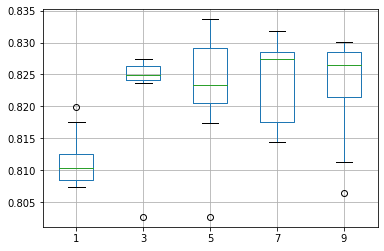

In [48]:
df_precisions = pd.DataFrame(df_precisions)
df_precisions.boxplot()

In [30]:
# Shuffle rows, and create train and test set
train = df.sample(frac=0.7)
test = df.sample(frac=0.3)

%time model = fasttext.train_supervised('train_fasttext.txt')

CPU times: user 26.1 s, sys: 332 ms, total: 26.4 s
Wall time: 5.45 s


In [31]:
model.test("test_fasttext.txt")

(750000, 0.815384, 0.815384)

In [ ]:
output_file = "output/output.csv"
if not test_locally:
    write(y_pred, output_file)